<a href="https://colab.research.google.com/github/donahl/donahl.github.io/blob/main/QUX_pytorch_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-2-bd5a63ee1f40>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  zs = np.array([criterion(torch.tensor(2 * X + 3, dtype=torch.float32), torch.tensor(w * X + b, dtype=torch.float32)).item() for w, b in zip(np.ravel(W), np.ravel(B))])


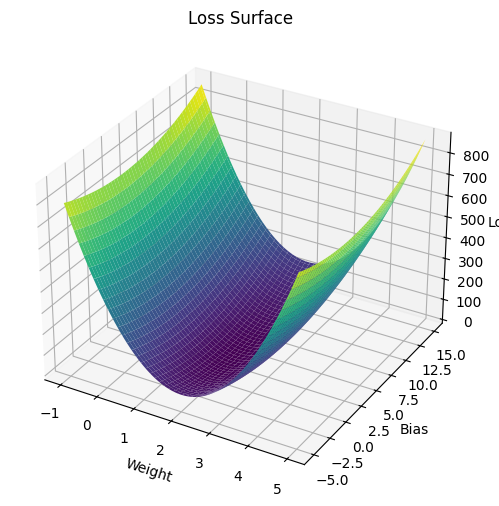

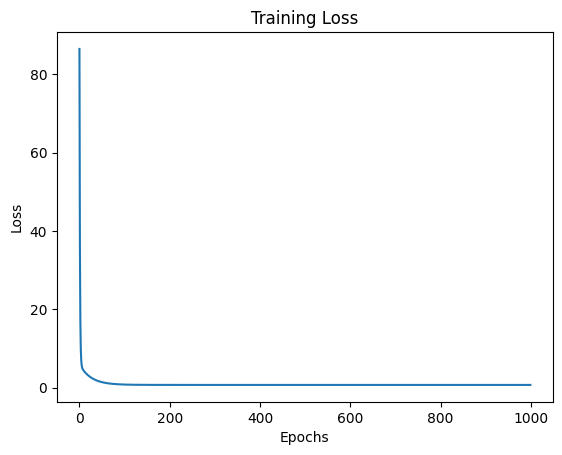

linear.weight tensor([[1.9883]])
linear.bias tensor([2.9277])


In [2]:
# prompt: Using Pytorch, create a linear regression sample and plot the loss surface

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data
X = torch.randn(100, 1) * 10
y = 2 * X + 3 + torch.randn(100, 1)

# Define the linear regression model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

# Create the model and define the loss function and optimizer
model = LinearRegression()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)


# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs, y)
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the loss surface
w_range = np.linspace(-1, 5, 100)
b_range = np.linspace(-5, 15, 100)

W, B = np.meshgrid(w_range, b_range)

zs = np.array([criterion(torch.tensor(2 * X + 3, dtype=torch.float32), torch.tensor(w * X + b, dtype=torch.float32)).item() for w, b in zip(np.ravel(W), np.ravel(B))])
Z = zs.reshape(W.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, Z, cmap='viridis')
ax.set_xlabel('Weight')
ax.set_ylabel('Bias')
ax.set_zlabel('Loss')
plt.title('Loss Surface')
plt.show()


#Plot the training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Print model parameters
for name, param in model.named_parameters():
  if param.requires_grad:
    print(name, param.data)


<ipython-input-3-37953264a276>:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  zs = np.array([criterion(torch.tensor(2 * X[:, 0] + 3 * X[:,1] + 5, dtype=torch.float32), torch.tensor(w1 * X[:, 0] + w2 * X[:, 1] + 5, dtype=torch.float32)).item() for w1, w2 in zip(np.ravel(W1), np.ravel(W2))])


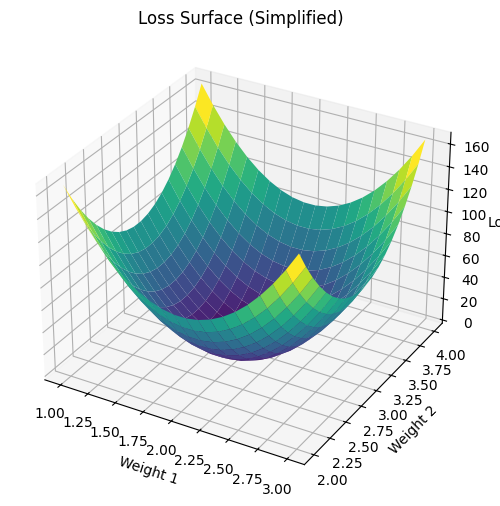

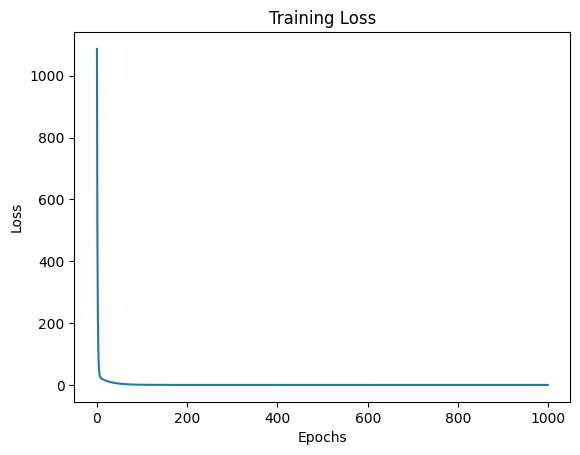

linear.weight tensor([[1.9951, 3.0117]])
linear.bias tensor([4.9790])


In [3]:
# prompt: Generate a pytorch code with 3D loss example and plot the surface loss

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Generate synthetic data (3D)
X = torch.randn(100, 2) * 10  # Two input features
y = 2 * X[:, 0] + 3 * X[:, 1] + 5 + torch.randn(100)  # Linear combination

# Define the linear regression model
class LinearRegression3D(nn.Module):
    def __init__(self):
        super(LinearRegression3D, self).__init__()
        self.linear = nn.Linear(2, 1)  # Two input features, one output

    def forward(self, x):
        return self.linear(x)

# Create the model, loss function, and optimizer
model = LinearRegression3D()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward pass
    outputs = model(X)
    loss = criterion(outputs.squeeze(), y)  # .squeeze() to match shapes
    losses.append(loss.item())

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# Plot the loss surface (simplified for visualization)
w1_range = np.linspace(1, 3, 20)
w2_range = np.linspace(2, 4, 20)
W1, W2 = np.meshgrid(w1_range, w2_range)

zs = np.array([criterion(torch.tensor(2 * X[:, 0] + 3 * X[:,1] + 5, dtype=torch.float32), torch.tensor(w1 * X[:, 0] + w2 * X[:, 1] + 5, dtype=torch.float32)).item() for w1, w2 in zip(np.ravel(W1), np.ravel(W2))])
Z = zs.reshape(W1.shape)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, Z, cmap='viridis')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')
plt.title('Loss Surface (Simplified)')
plt.show()


#Plot the training loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Print model parameters
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)


In [11]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the pretrained BERT model (fine-tuned for sentiment classification)
MODEL_NAME = "nlptown/bert-base-multilingual-uncased-sentiment"  # Supports multiple languages

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)
model = BertForSequenceClassification.from_pretrained(MODEL_NAME)

# Set model to evaluation mode
model.eval()

def predict_sentiment(text):
    """Predicts sentiment from text using a pretrained BERT model."""
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)

    # Forward pass
    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs.logits
    predicted_class = torch.argmax(logits, dim=1).item()  # Get class index

    # Sentiment mapping for this specific model (1-5 scale)
    sentiment_labels = {
        0: "Very Negative 😡",
        1: "Negative 🙁",
        2: "Neutral 😐",
        3: "Positive 🙂",
        4: "Very Positive 😃"
    }

    return sentiment_labels[predicted_class]

# Example usage
reviews = [
    "This movie was absolutely amazing! I loved every minute of it.",
    "A terrible film. The acting was poor and the plot was confusing.",
    "I found this movie to be quite enjoyable. Good acting and a decent story.",
    "Not a good movie. Waste of time and money.",
    "One of the best movies I have ever seen!",
    "A very disappointing movie. I expected more.",
    "This film was a masterpiece. Highly recommended.",
    "I didn't like this movie at all.",
    "A surprisingly good movie. I was pleasantly surprised.",
    "This movie was okay, nothing special."
]

for review in reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")

#text = "I love this product! It's amazing."
#sentiment = predict_sentiment(text)
#print(f"Sentiment: {sentiment}")

Review: This movie was absolutely amazing! I loved every minute of it.
Sentiment: Very Positive 😃
Review: A terrible film. The acting was poor and the plot was confusing.
Sentiment: Very Negative 😡
Review: I found this movie to be quite enjoyable. Good acting and a decent story.
Sentiment: Positive 🙂
Review: Not a good movie. Waste of time and money.
Sentiment: Very Negative 😡
Review: One of the best movies I have ever seen!
Sentiment: Very Positive 😃
Review: A very disappointing movie. I expected more.
Sentiment: Negative 🙁
Review: This film was a masterpiece. Highly recommended.
Sentiment: Very Positive 😃
Review: I didn't like this movie at all.
Sentiment: Very Negative 😡
Review: A surprisingly good movie. I was pleasantly surprised.
Sentiment: Positive 🙂
Review: This movie was okay, nothing special.
Sentiment: Neutral 😐


In [12]:
reviews = [
    "Fantastic game.",
    "l liked it but l kept on crushing. l will keep on playing.",
    "In my opinion this karting game needs to have levels from the beginning. The player could choose between levels easy, medium, and hard.",
    "Great game! I really like it.",
    "I think this game has potential. However there was no challenge. I would prefer if the obstacles were not go-through"
]
for review in reviews:
    sentiment = predict_sentiment(review)
    print(f"Review: {review}")
    print(f"Sentiment: {sentiment}")

Review: Fantastic game.
Sentiment: Very Positive 😃
Review: l liked it but l kept on crushing. l will keep on playing.
Sentiment: Neutral 😐
Review: In my opinion this karting game needs to have levels from the beginning. The player could choose between levels easy, medium, and hard.
Sentiment: Neutral 😐
Review: Great game! I really like it.
Sentiment: Very Positive 😃
Review: I think this game has potential. However there was no challenge. I would prefer if the obstacles were not go-through
Sentiment: Neutral 😐
